In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import numpy as np

df = pd.read_csv("1000 reviews with normalized scores.csv")
df.head()

Unnamed: 0             business_id  cool                 date  funny  \
0       84442  XH2TZmZt6gzHHpjqk8C6pg     1  2009-05-26 13:42:02      3   
1       75795  yNVcnSaMSrTmjJBMrHTy9w     2  2012-06-01 18:22:23      1   
2       42057  zk3AimWhuz0EZsNgIddKdg     0  2018-05-19 16:05:50      0   
3       25891  MN0Pd66285k2k9lkpEtptA     0  2017-03-15 20:01:16      0   
4       51127  N9oZ9GDPf65x6zv7fsKJvA     0  2012-11-07 23:02:55      1   

                review_id  stars  useful                 user_id  fear_score  \
0  rtQJU6GHxnxsXKBspKzWaA      5       6  lJzgOpVS1pmb2UW7j2GkDg    2.405523   
1  wU-awV0uGkZdjnIFsgoTQA      4       5  8iqGB11mHwCTLOOHkqnqmQ    0.532827   
2  WBE8cGKMIJggpXRA4KTaog      2       0  qFk5mtbEqpRgg2v2HRoryQ    0.365300   
3  _NcurWksF9tSwXK9Mq3GIA      1       0  D4xs1lDiug7hU_NfPnJxpQ    1.301386   
4  bQ1zd9OOjNwMJexVp2jZSA      3       2  cuVrNmt7_WtBn1uz5L_p0g    0.148931   

   ...  neutral_score  surprise_score  disgust_score  fear_normalized  \
0  ...       1.005997        2.925512       1.423982         0.154263   
1  ...       0.153021        0.549298       0.138426         0.200740   
2  ...       0.130912        0.293360       0.315442         0.132739   
3  ...       0.449623        1.360330       0.515131         0.176703   
4  ...       0.061737        0.425446       0.080027         0.104764   

   happy_normalized  sad_normalized  anger_normalized  neutral_normalized  \
0          0.194019        0.164339          0.143937            0.064513   
1          0.193448        0.136829          0.152236            0.057650   
2          0.322269        0.110795          0.165409            0.047569   
3          0.162737        0.137485          0.207375            0.061050   
4          0.193086        0.117864          0.185288            0.043428   

   surprise_normalized  disgust_normalized  
0             0.187610            0.091318  
1             0.206945            0.052151  
2             0.106598            0.114622  
3             0.184706            0.069945  
4             0.299275            0.056294  

[5 rows x 23 columns]

In [39]:
df.columns

Index(['Unnamed: 0', 'business_id', 'cool', 'date', 'funny', 'review_id',
       'stars', 'useful', 'user_id', 'fear_score', 'happy_score', 'sad_score',
       'anger_score', 'neutral_score', 'surprise_score', 'disgust_score',
       'fear_normalized', 'happy_normalized', 'sad_normalized',
       'anger_normalized', 'neutral_normalized', 'surprise_normalized',
       'disgust_normalized'],
      dtype='object')

(array([758., 100.,  45.,  26.,  21.,   9.,   8.,   7.,   7.,   3.,   1.,
          0.,   1.,   1.,   1.,   2.,   1.,   2.,   1.,   1.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          1.,   0.,   0.,   0.,   1.,   0.,   1.]),
 array([ 0.  ,  1.05,  2.1 ,  3.15,  4.2 ,  5.25,  6.3 ,  7.35,  8.4 ,
         9.45, 10.5 , 11.55, 12.6 , 13.65, 14.7 , 15.75, 16.8 , 17.85,
        18.9 , 19.95, 21.  , 22.05, 23.1 , 24.15, 25.2 , 26.25, 27.3 ,
        28.35, 29.4 , 30.45, 31.5 , 32.55, 33.6 , 34.65, 35.7 , 36.75,
        37.8 , 38.85, 39.9 , 40.95, 42.  ]),
 <a list of 40 Patch objects>)

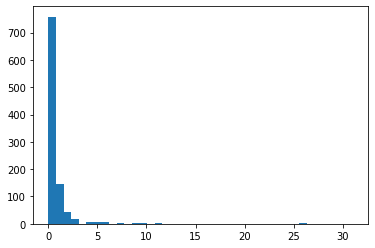

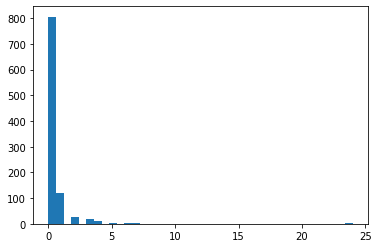

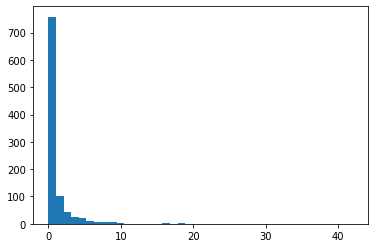

In [70]:
import matplotlib.pyplot as plt

tags = pd.DataFrame(df, columns = ['cool', 'funny', 'useful'])

#X_binary_train
fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 1, 1)
ax1.hist(tags['cool'], bins = 40)
fig2 = plt.figure()
ax2 = fig2.add_subplot(1, 1, 1)
ax2.hist(tags['funny'], bins = 40)
fig3 = plt.figure()
ax3 = fig3.add_subplot(1, 1, 1)
ax3.hist(tags['useful'], bins = 40)

In [71]:
#linear for funny
import statsmodels.api as sm
from scipy import stats

X = pd.DataFrame(df, columns = ["fear_normalized", "happy_normalized", "sad_normalized", "anger_normalized",\
                                "neutral_normalized", "surprise_normalized","disgust_normalized"])

X_train_funny, X_test_funny, Y_train_funny, Y_test_funny = train_test_split(X,tags['funny'],test_size = 0.30, random_state=11)

funny_linear = sm.OLS(Y_train_funny, X_train_funny)
funny_linear_fit = funny_linear.fit()
print(funny_linear_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  funny   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.340
Date:                Fri, 01 Nov 2019   Prob (F-statistic):              0.237
Time:                        12:32:14   Log-Likelihood:                -1477.3
No. Observations:                 700   AIC:                             2969.
Df Residuals:                     693   BIC:                             3000.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
fear_normalized         4.5106    

In [ ]:
import statsmodels.api as sm
from scipy import stats

X = pd.DataFrame(df, columns = ["fear_normalized", "happy_normalized", "sad_normalized", "anger_normalized",\
                                "neutral_normalized", "surprise_normalized","disgust_normalized"])

In [41]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, Y_train)
sgd_clf.predict(X_train)

array([5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5,
       5, 5, 5, 4, 5, 5, 5, 4, 5, 5, 4, 5, 5, 4, 5, 4, 5, 5, 5, 1, 2, 2,
       5, 5, 5, 5, 5, 2, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 1, 4, 5, 5, 5, 4, 5, 5, 2, 5, 5, 1, 2, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       4, 4, 5, 5, 5, 4, 5, 5, 4, 5, 5, 4, 4, 5, 5, 5, 5, 4, 5, 5, 1, 4,
       5, 5, 5, 5, 5, 5, 5, 2, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5,
       5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5,
       4, 5, 5, 5, 4, 5, 5, 5, 4, 4, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 4, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5,
       5, 5, 5, 5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 4,
       4, 4, 5, 5, 5, 2, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5,
       5, 1, 2, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 4, 5, 5, 5, 5,
       5, 2, 5, 5, 5, 5, 2, 5, 2, 5, 2, 5, 5, 5, 5,

In [42]:
Y_train.ravel()

array([4, 5, 5, 5, 1, 4, 3, 5, 5, 5, 3, 5, 2, 4, 4, 4, 2, 4, 5, 5, 5, 4,
       5, 1, 5, 1, 5, 5, 5, 1, 5, 3, 1, 5, 1, 4, 5, 1, 5, 5, 5, 1, 5, 2,
       5, 4, 5, 3, 1, 1, 1, 1, 4, 2, 2, 4, 5, 1, 1, 3, 5, 3, 5, 5, 5, 5,
       2, 5, 4, 5, 5, 5, 4, 4, 1, 5, 5, 5, 5, 1, 1, 5, 5, 5, 5, 5, 2, 5,
       5, 5, 5, 2, 1, 5, 5, 5, 4, 2, 5, 4, 4, 1, 5, 2, 4, 5, 5, 2, 5, 5,
       1, 1, 5, 5, 5, 3, 1, 5, 4, 4, 5, 3, 4, 5, 4, 4, 5, 2, 4, 3, 5, 1,
       5, 4, 5, 4, 4, 4, 1, 1, 3, 3, 3, 2, 5, 4, 5, 5, 4, 5, 3, 1, 4, 5,
       5, 1, 4, 5, 5, 3, 5, 3, 5, 3, 1, 5, 5, 5, 5, 4, 5, 3, 5, 3, 3, 4,
       3, 5, 5, 5, 4, 5, 2, 5, 3, 5, 2, 2, 3, 1, 4, 3, 4, 4, 5, 4, 5, 5,
       4, 4, 5, 5, 5, 5, 2, 5, 2, 5, 5, 3, 3, 5, 1, 5, 5, 5, 5, 3, 5, 3,
       5, 5, 5, 5, 5, 4, 5, 1, 5, 5, 5, 5, 5, 1, 4, 5, 2, 5, 1, 4, 2, 1,
       1, 5, 2, 5, 5, 2, 5, 5, 1, 3, 5, 5, 5, 5, 5, 1, 3, 2, 4, 3, 5, 5,
       4, 5, 4, 5, 1, 5, 5, 5, 4, 3, 3, 1, 1, 5, 3, 2, 5, 5, 3, 4, 3, 5,
       4, 1, 5, 5, 1, 5, 1, 5, 2, 5, 1, 3, 5, 2, 5,

In [43]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, Y_train, cv = 3, scoring = "accuracy")

array([0.42735043, 0.47863248, 0.4612069 ])

In [44]:
sgd_clf.get_params

<bound method BaseEstimator.get_params of SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)>

In [45]:
sgd_clf.classes_

array([1, 2, 3, 4, 5], dtype=int64)

In [55]:
#Verify that most common value is 0
print('cool: ' + str(tags['cool'].value_counts().idxmax()) + 
      '\nfunny: ' + str(tags['funny'].value_counts().idxmax()) + 
      '\nuseful: ' + str(tags['useful'].value_counts().idxmax()))

cool: 0
funny: 0
useful: 0


In [54]:
print('cool: ' + str(tags['cool'].mean()) + 
      '\nfunny: ' + str(tags['funny'].mean()) + 
      '\nuseful: ' + str(tags['useful'].mean()))

cool: 0.629
funny: 0.496
useful: 1.378


In [56]:
#are means equal to variances? if so, POISSON REGRESSION
print('cool: ' + str(np.var(tags['cool'])) + 
      '\nfunny: ' + str(np.var(tags['funny'])) + 
      '\nuseful: ' + str(np.var(tags['useful'])))

cool: 5.349359000000027
funny: 3.9319840000000323
useful: 11.08911600000007


In [64]:
#screw it, trying POISSON anyway because I'm curious ERROR THAT I CAN'T FIGURE OUT
from statsmodels.genmod.generalized_estimating_equations import GEE
from statsmodels.genmod.cov_struct import (Exchangeable,
    Independence,Autoregressive)
from statsmodels.genmod.families import Poisson

import statsmodels.api as sm
import statsmodels.formula.api as smf

input_df = X_train_funny
input_df['funny']=funny_train

fam = Poisson()
ind = Independence()
funny_model = smf.gee("funny ~ fear_normalized + happy_normalized + sad_normalized + anger_normalized +\
                            neutral_normalized + surprise_normalized + disgust_normalized",'subject', data= input_df, cov_struct=ind, family=fam)
funny_result = funny_model.fit()
print(funny_result.summary())

C:\Users\kevin\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


KeyError: 'subject'

In [67]:
#LDA on funny
X_train_funny, X_test_funny, funny_train, funny_test = train_test_split(X,tags['funny'],test_size = 0.30, random_state=11)

lda_funny = LinearDiscriminantAnalysis()
lda_funny.fit(X_train_funny, funny_train)
lda_funny.predict(X_train_funny)

C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, 10,  0,  0

In [68]:
funny_train.ravel()

array([ 0,  0,  0,  0,  1,  0,  0,  0,  1,  1,  1,  3,  1,  6,  0,  0,  0,
       24,  0,  0,  0,  0,  1,  0,  1,  0,  2,  0,  0,  0,  0,  0,  1,  0,
        0,  2,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  0,  0,  1, 10,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,
        0,  0,  0,  1,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,
        0,  0,  0,  0,  1,  0,  0,  0,  0,  2,  0,  0,  0,  1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,
        4,  1,  0,  1,  0,  0,  0,  0,  0,  1,  0,  2,  0,  0,  0,  0,  0,
        0,  0,  0,  3,  0,  0,  2,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0

In [69]:
cross_val_score(lda_funny, X_train_funny, funny_train, cv = 3, scoring = "accuracy")

C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


array([0.775     , 0.80172414, 0.81578947])

In [13]:
import seaborn as sns
corr = X.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

[Text(0.5, 0, 'fear_normalized'),
 Text(1.5, 0, 'happy_normalized'),
 Text(2.5, 0, 'sad_normalized'),
 Text(3.5, 0, 'anger_normalized'),
 Text(4.5, 0, 'neutral_normalized'),
 Text(5.5, 0, 'surprise_normalized'),
 Text(6.5, 0, 'disgust_normalized')]

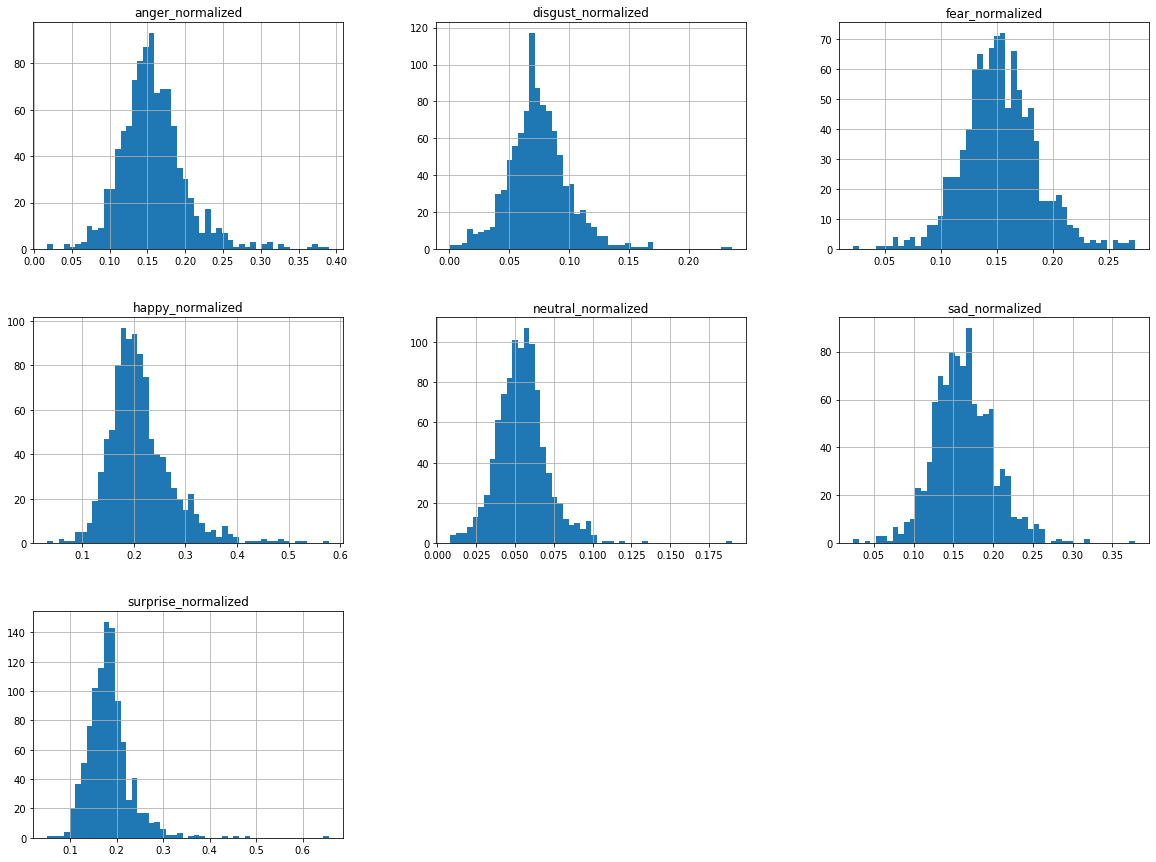

In [14]:
import matplotlib.pyplot as plt
X.hist(bins = 50, figsize = (20, 15))
plt.show()

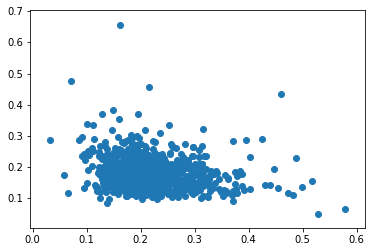

In [15]:
plt.scatter(X["happy_normalized"], X["surprise_normalized"])
plt.show()

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [17]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)

voting_clf = VotingClassifier(
    estimators = [("lr", log_clf), ("rf", rnd_clf), ("svc", svm_clf)],
    voting = "soft")
voting_clf.fit(X_train, Y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(Y_test, y_pred))

C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kevin\

LogisticRegression 0.4533333333333333
RandomForestClassifier 0.4033333333333333
SVC 0.4533333333333333


C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to

VotingClassifier 0.46


In [18]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
    estimators = [("lr", log_clf), ("rf", rnd_clf), ("svc", svm_clf)],
    voting = "hard")
voting_clf.fit(X_train, Y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(Y_test, y_pred))

LogisticRegression 0.4533333333333333
RandomForestClassifier 0.4033333333333333
SVC 0.4533333333333333
VotingClassifier 0.4533333333333333


C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kevin\